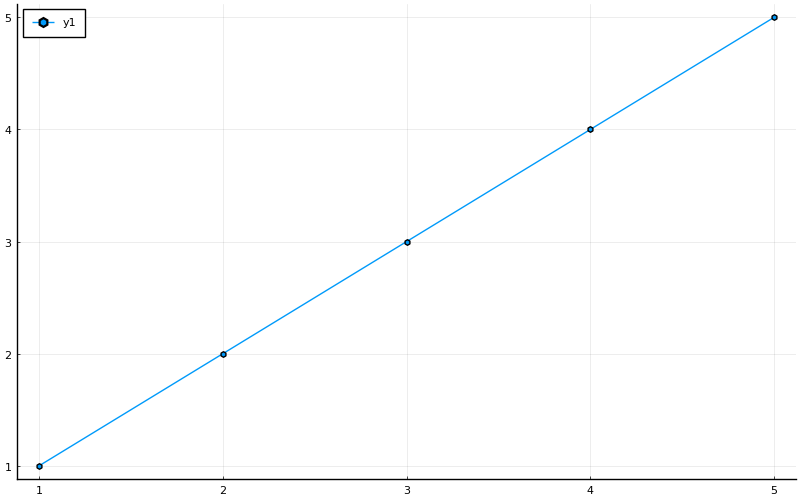

In [270]:
using Plots
pyplot(size=(800,500))
plot(1:5,marker=([:hex :d]))

# default

In [331]:
function NextIteration(prev,N,α)

next=zeros(length(prev))
C=sum(prev)

for s in 2:Integer(N/2)
    next[s]=1.0*prev[s]
    PIN=(prev[s]/N)
    for y in 2:Integer(N/2)
        if s<y
            next[s]-=PIN*(prev[y]/C)*2*(s-1)
        else
            next[s]-=PIN*(prev[y]/C)*2*(y-1)
        end
    end
    next[s]-=prev[s]/C
end

return next
    
end

NextIteration (generic function with 2 methods)

# uniform y-distribution

In [176]:
function NextIteration(prev,N,α)

next=zeros(length(prev))
C=sum(prev)

for s in 2:Integer(N/2)
    next[s]=prev[s]
    for y in 2:Integer(N/2)
        if s<y
            next[s]-=(prev[s]/N)*(1/(-1+N/2))*2*(s-1)
        else
            next[s]-=(prev[s]/N)*(1/(-1+N/2))*2*(y-1)
        end
    end
end

return next
    
end

NextIteration (generic function with 1 method)

# alpha-experiment

In [342]:
function NextIteration(prev,N,α)

next=zeros(length(prev))
C=sum(prev)

for s in 2:Integer(N/2)
    next[s]=1.0*prev[s]
    PIN=((prev[s]/N)^α)
    for y in 2:Integer(N/2)
        if s<y
            next[s]-=PIN*(prev[y]/C)*2*(s-1)
        else
            next[s]-=PIN*(prev[y]/C)*2*(y-1)
        end
    end
    next[s]-=prev[s]/C
end

return next

end

NextIteration (generic function with 2 methods)

# running code for different N

In [343]:
α=1.4

N=100
prev=N*ones(Integer(N/2))
prev[1]=0
prev[end]/=2
P=prev/sum(prev)
for k in 0:N-4
    next=NextIteration(prev,N,α)
    prev=next
    P+=prev/sum(prev)
end
P100=P

N=500
prev=N*ones(Integer(N/2))
prev[1]=0
prev[end]/=2
P=prev/sum(prev)
for k in 0:N-4
    next=NextIteration(prev,N,α)
    prev=next
    P+=prev/sum(prev)
end
P500=P;

N=1000
prev=N*ones(Integer(N/2))
prev[1]=0
prev[end]/=2
P=prev/sum(prev)
for k in 0:N-4
    next=NextIteration(prev,N,α)
    prev=next
    P+=prev/sum(prev)
end
P1000=P;

N=3000
prev=N*ones(Integer(N/2))
prev[1]=0
prev[end]/=2
P=prev/sum(prev)
for k in 0:N-4
    next=NextIteration(prev,N,α)
    prev=next
    P+=prev/sum(prev)
end
P3000=P;

# plot result in loglog-plot

-1.3935253411852229


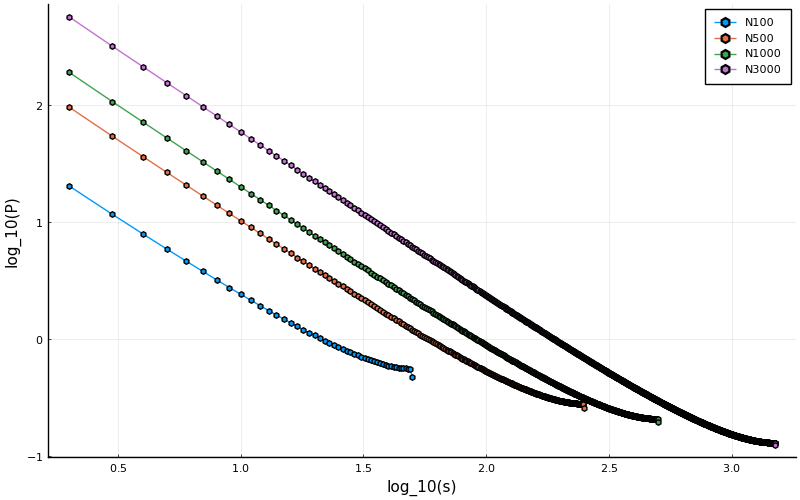

In [344]:
println((log.(10,P3000[2])-log.(10,P3000[200]))/(log.(10,2)-log.(10,200)))
plot(log.(10,2:100/2),log.(10,P100[2:end]),marker=([:hex :d]),label="N100",xlabel="log_10(s)",ylabel="log_10(P)")
plot!(log.(10,2:500/2),log.(10,P500[2:end]),marker=([:hex :d]),label="N500")
plot!(log.(10,2:1000/2),log.(10,P1000[2:end]),marker=([:hex :d]),label="N1000")
plot!(log.(10,2:3000/2),log.(10,P3000[2:end]),marker=([:hex :d]),label="N3000")